In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
def calcular_amortizacion_frances(principal, tasa_interes_anual, num_cuotas):
    """
    Calcula la amortización de un préstamo utilizando el método francés.

    Parámetros:
    - principal: Monto total del préstamo.
    - tasa_interes_anual: Tasa de interés anual (en formato decimal, por ejemplo, 5% = 0.05).
    - num_cuotas: Número total de cuotas a pagar.

    Retorna:
    - DataFrame: Un DataFrame de pandas con la información de cada cuota.
    """
    # Calcular la tasa de interés nominal mensual
    tasa_interes_mensual = tasa_interes_anual / 12
    
    # Calcular la cuota constante (C)
    cuota = (principal * tasa_interes_mensual) / (1 - (1 + tasa_interes_mensual) ** -num_cuotas)

    print('La cuota es: ' +str(cuota))
    
    # Inicializar lista para almacenar los resultados
    resultados = []
    
    # Inicializar saldo
    saldo = principal
    
    for i in range(1, num_cuotas + 1):
        # Calcular el interés del saldo actual
        interes = saldo * tasa_interes_mensual
        
        # Calcular la amortización del capital
        amortizacion_capital = cuota - interes
        
        # Actualizar el saldo restante
        saldo -= amortizacion_capital #> saldo= saldo-amortizacion
        
        # Guardar los resultados en una lista
        resultados.append({
            'Cuota': i,
            'Interés': round(interes, 2),
            'Amortización Capital': round(amortizacion_capital, 2),
            'Cuota Total': round(cuota, 2),
            'Saldo Restante': round(saldo, 2)
        })
    
    # Crear un DataFrame a partir de la lista de resultados
    df_amortizacion = pd.DataFrame(resultados)
    
    return df_amortizacion

In [3]:
monto_prestamo = 300000000*0.7 # Monto del préstamo
print('El valor del prestamos es: '+f"""{monto_prestamo}""")
tasa_interes = ((1+0.13)**(1/12)-1)*12 # Tasa de interés Nominal anual (13%EA)
print('La tasa de interes es nominal anual es de: '+f"""{tasa_interes}""")
print('La tasa de interes es nominal mensual es de: '+f"""{tasa_interes/12}""")
cuotas = 20*12 # Número de cuotas

df_resultados = calcular_amortizacion_frances(monto_prestamo, tasa_interes, cuotas)

El valor del prestamos es: 210000000.0
La tasa de interes es nominal anual es de: 0.1228421322981168
La tasa de interes es nominal mensual es de: 0.0102368443581764
La cuota es: 2354025.0075067165


In [4]:
i_men=tasa_interes/12
c=(monto_prestamo*i_men)/(1-(1+i_men)**-cuotas)
c

2354025.0075067165

In [5]:
df_resultados

,Cuota,Interés,Amortización Capital,Cuota Total,Saldo Restante
0,1,2149737.32,204287.69,2354025.01,2.097957e+08
1,2,2147646.05,206378.95,2354025.01,2.095893e+08
2,3,2145533.38,208491.62,2354025.01,2.093808e+08
3,4,2143399.09,210625.92,2354025.01,2.091702e+08
4,5,2141242.94,212782.06,2354025.01,2.089574e+08
...,...,...,...,...,...
235,236,116875.27,2237149.74,2354025.01,9.179969e+06
236,237,93973.91,2260051.09,2354025.01,6.919918e+06
237,238,70838.12,2283186.89,2354025.01,4.636731e+06
238,239,47465.49,2306559.51,2354025.01,2.330171e+06


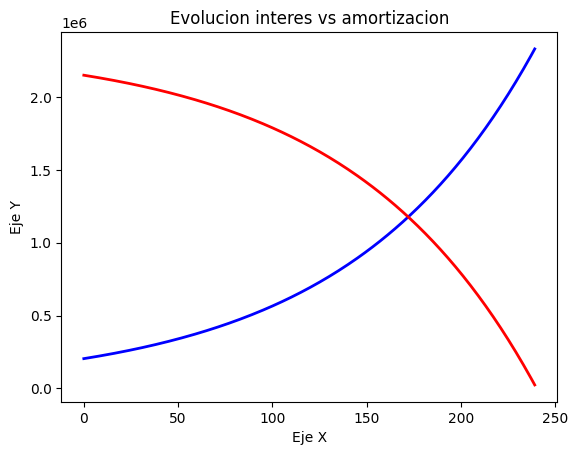

In [6]:
import matplotlib.pyplot as plt
plt.plot(df_resultados.index, df_resultados['Amortización Capital'], label='Amortizacion', color='blue', linewidth=2)
plt.plot(df_resultados.index, df_resultados['Interés'], label='Interes', color='red', linewidth=2)
plt.title('Evolucion interes vs amortizacion')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()